# Data Preprocessing (Advanced)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from thefuzz import fuzz
import PIL
from IPython.display import Image

from bs4 import BeautifulSoup


from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Navdeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Navdeep\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv('train_added_columns.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,Common_words,words_set,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66.0,57.0,14.0,12.0,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51.0,88.0,8.0,13.0,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73.0,59.0,14.0,10.0,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50.0,65.0,11.0,9.0,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76.0,39.0,13.0,7.0,2.0,20.0,0.100000,4,2


In [3]:

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace('.', ' .')
    x = x.replace(',', ' ,')
    x = x.replace('?', ' ?')
    x = x.replace('!', ' !')
    x = x.replace('(', ' ( ')
    x = x.replace(')', ' ) ')
    x = x.replace('-', ' - ')
    x = x.replace('\'', ' \' ')
    x = x.replace('"', ' " ')
    x = x.replace(':', ' : ')
    x = x.replace(';', ' ; ')
    x = x.replace('/', ' / ')
    x = x.replace('\\', ' \\ ')
    x = x.replace('*', ' * ')
    x = x.replace('+', ' + ')
    x = x.replace('=', ' = ')
    x = x.replace('#', ' # ')
    x = x.replace('<', ' < ')
    x = x.replace('>', ' > ')
    x = x.replace('|', ' | ')
    x = x.replace('$', ' $ ')
    x = x.replace('%', ' % ')
    x = x.replace('^', ' ^ ')
    x = x.replace('&', ' & ')
    x = x.replace('@', ' @ ')
    x = x.replace('~', ' ~ ')
    x = x.replace('`', ' ` ')
    x = x.replace('_', ' _ ')
    x = x.replace('{', ' { ')
    x = x.replace('}', ' } ')
    x = x.replace('[', ' [ ')
    x = x.replace(']', ' ] ')
    x = x.replace('\n', ' \n ')
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    snow_stemmer = SnowballStemmer(language='english')
    pattern = re.compile('\W')
    x = snow_stemmer.stem(x)
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = snow_stemmer.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_x()
               
    
    return x


In [4]:
if os.path.isfile("stopword_preprocessed_data.csv"):
    df = pd.read_csv("stopword_preprocessed_data.csv")
    df.drop("Unnamed: 0", axis = 1, inplace=True)
else:
    df["question1"] = df["question1"].dropna().apply(preprocess)
    df["question2"] = df["question2"].dropna().apply(preprocess)
    df.to_csv("stopword_preprocessed_data.csv", index="False")

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,Common_words,words_set,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66.0,57.0,14.0,12.0,10.0,23.0,0.434783,2,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51.0,88.0,8.0,13.0,4.0,20.0,0.200000,5,3
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73.0,59.0,14.0,10.0,4.0,24.0,0.166667,2,0
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50.0,65.0,11.0,9.0,0.0,19.0,0.000000,2,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76.0,39.0,13.0,7.0,2.0,20.0,0.100000,4,2


### Advanced Feature Extraction (NLP and Fuzzy Features)

Definition:
- __Token__: We get a token by splitting a sentence along spaces.
- __Stop Word__: Stop words a per _NLTK_.
- __Word__: A token that is not a _Stop Word_.

Features:
- __cwc_min__: Ratio of common word count to  minimum length of word count of Question 1 and Question 2.
    - __cwc_min__ = (common word count) / (min(len(q1_words), len(q2_words))
- __cwc_max__: Ratio of common word count to  maximum length of word count of Question 1 and Question 2.
    - __cwc_max__ = (common word count) / (max(len(q1_words), len(q2_words))
    
    
- __first_word_eq__: Check if the first word in questions is equal or not
    - __first_word_eq__ = int(q1_tokens[0] == q2_tokens[-1])
- __last_word_eq__: Check if the last word in questions is equal or not
    - __last_word_eq__ = int(q1_tokens[0] == q2_tokens[-1])


- __ctc_min__: Ration of common token count to minimum length of word count of both questions.
    - __ctc_min__ =  (common token count) / min(len(q1_words), len(q2_words))
- __ctc_max__: Ration of common token count to maximum length of word count of both questions.
    - __ctc_max__ =  (common token count) / max(len(q1_words), len(q2_words))
    

- __csc_min__: Ratio of common_stop_count to minimum length of stop words count of both questions
    - __csc_min__ = (common stop word) / (min(len(q1_stops), len(q2_stops))
- __csc_max__: Ratio of common_stop_count to maximum length of stop words count of both questions
    - __csc_max__ = (common stop word) / (max(len(q1_stops), len(q2_stops))
    
    
- __mean_len__: Average token lengt of both questions
    - __mean_len__ = (len(q1_tokens) + len(q2_tokens)) / 2
    
- __abs_len_diff__: Absolute length difference
    - __abs_len_diff__ = abs(len(q1_tokens) - len(q2_tokens))
    
    
- __longest_substr_ratio__: Ratio of longest common substring to minimum length of token count of both the questions
    - __longest_substr_ratio__ = len(longest common substring) / min(len(q1_tokens), len(q2_tokens))
    



## Fuzzy Features

__TheFuzz__: This is an excellent string matching library that uses Levenshtein Distance to calculate the difference between sequences.

#### fuzzy_ratio:
String matching algorithm that finds similarity of words with edit distance as a measure. 

`fuzz.ratio("this is a test", "this is a test!") => 96`

- This seems to be a pretty good measure! But this has some flaws, it works fine for very short strings and very long strings but not for strings that has 3-10 words. The naive method is far too sensitive to minor differences in word order, missing or extra words, and other such issues.

__fuzzy_partial_ratio__: 

`fuzz.ratio("super kings", "chennai super kings") => 73`    
`fuzz.ratio("china super kings", "chennai super kings") => 89`    

- The first parameters refers to the same teams, we get a score of 73. The arguments of the second line are two very different set, but we got a score of 86! More then that for the first set. How can we overcome this? We'll use _fuzz_partial_ratio_ instead.  

`fuzz.partial_ratio("super kings", "chennai super kings") => 100`   
`fuzz.partial_ratio("china super kings", "chennai super kings") => 82`

- This seems pretty good measure! Internally what it does is, it matches the strings based on the smallest string and not on the whole string.

#### token_partial_ratio: 
What if we have two sequences of different orders? _out of order_

` fuzz.ratio("chennai super kings vs royal challengers bengaluru", "royal challengers bengaluru vs chennai super kings") => 54` 

` fuzz.partial_ratio("chennai super kings vs royal challengers bengaluru", 
                    "royal challengers bengaluru vs chennai super kings") => 70`
                    

- We can see that both the strings are excatly same with different orders, but we get a relatively low score. In this case, we'll use _token_partial_ratio_

`fuzz.token_sort_ratio("royal challengers bengaluru vs chennai super kings",
                        "chennai super kings vs royal challengers bengaluru") => 100`

#### token_set_ratio:
What if we have repeated tokens?

` fuzz.token_sort_ratio("chennai chennai super kings", "chennai super kings") => 83`  
` fuzz.token_set_ratio("chennai chennai super kings", "chennai super kings") => 100`

### Let's process our dataset and add the features mentioned above

In [6]:
from array import array


def lcsubstrings(seq1, seq2, positions=False):
	"""Find the longest common substring(s) in the sequences `seq1` and `seq2`.
	
	If positions evaluates to `True` only their positions will be returned,
	together with their length, in a tuple:
	
		(length, [(start pos in seq1, start pos in seq2)..])
	
	Otherwise, the substrings themselves will be returned, in a set.
	
	Example:
	
		lcsubstrings("sedentar", "dentist")
		{'dent'}
		lcsubstrings("sedentar", "dentist", positions=True)
		(4, [(2, 0)])
	"""
	L1, L2 = len(seq1), len(seq2)
	ms = []
	mlen = last = 0
	if L1 < L2:
		seq1, seq2 = seq2, seq1
		L1, L2 = L2, L1
	
	column = array('L', range(L2))
	
	for i in range(L1):
		for j in range(L2):
			old = column[j]
			if seq1[i] == seq2[j]:
				if i == 0 or j == 0:
					column[j] = 1
				else:
					column[j] = last + 1
				if column[j] > mlen:
					mlen = column[j]
					ms = [(i, j)]
				elif column[j] == mlen:
					ms.append((i, j))
			else:
				column[j] = 0
			last = old
	
	if positions:
		return (mlen, tuple((i - mlen + 1, j - mlen + 1) for i, j in ms if ms))
	return set(seq1[i - mlen + 1:i + 1] for i, _ in ms if ms)

In [7]:
SAFE_DIV = 0.0001
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    print("cwc_max...")
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    print("csc_min...")
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    print("csc_max...")
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    print("ctc_min...")
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    print("ctc_max...")
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    print("last_word_equal...")
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    print("first_word_equal...")
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    print("abs_len_diff...")
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    print("mean_len...")
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset

    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    print("token_sort_ratio...")
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    print("fuzzy_ratio...")
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    print("fuzz_partial_ratio...")
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    print("longest_partial_ratio...")
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [8]:
if os.path.isfile('advanced_features_train.csv'):
    df = pd.read_csv("advanced_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("advanced_features_train.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


### Analysis of extracted features

In [21]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s', encoding='utf-8')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s', encoding='utf-8')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [29]:
d = os.path.dirname('.')

textp_w = open(os.path.join(d, 'train_p.txt'), encoding='utf-8').read()
textn_w = open(os.path.join(d, 'train_n.txt'), encoding='utf-8').read()


stopwords = set(STOPWORDS)

stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.add("not")

stopwords.remove("no")
stopwords.remove("like")

Word Cloud for Duplicate Question Pairs (p)


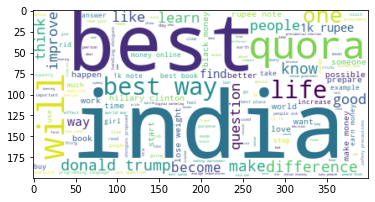

In [31]:
word_cloud = WordCloud(background_color="white", max_words=len(p), stopwords=stopwords)
word_cloud.generate(textp_w)

print("Word Cloud for Duplicate Question Pairs (p)")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

Word Cloud for Non-duplicate Wuestion Pairs (n)


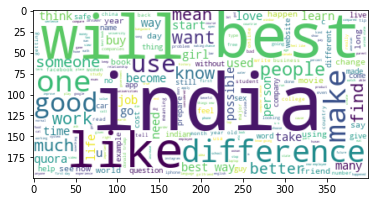

In [33]:
word_cloud = WordCloud(background_color="white", max_words=len(n), stopwords=stopwords)

word_cloud.generate(textn_w)
print("Word Cloud for Non-duplicate Wuestion Pairs (n)")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

### Analysing our advanced features

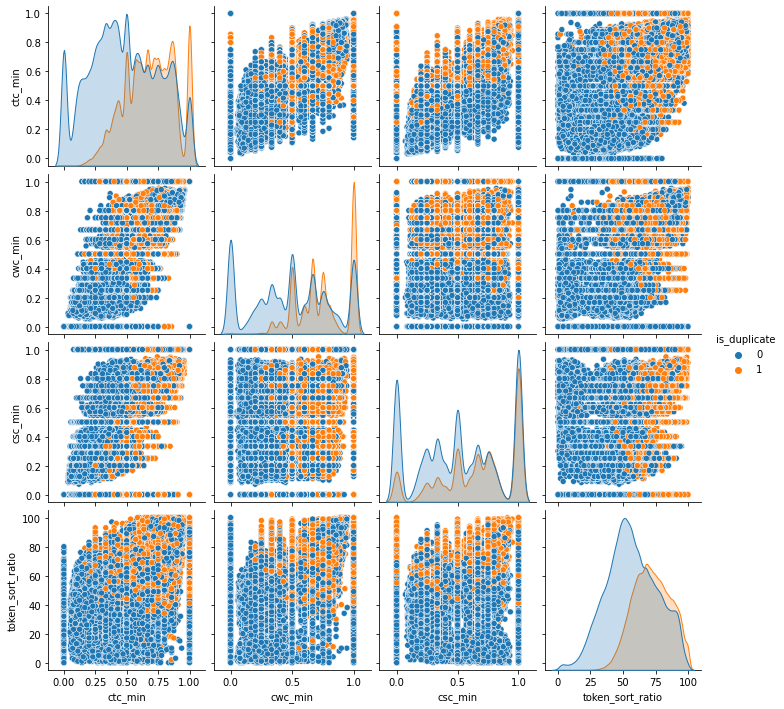

In [43]:
if os.path.exists("pair_plot.png"):
    img = Image(filename="pair_plot.png")
    display(img)
#     img = PIL.Image.open("pair_plot.png")
#     img.show()
else:
    n = df.shape[0]
    sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
    plt.show()

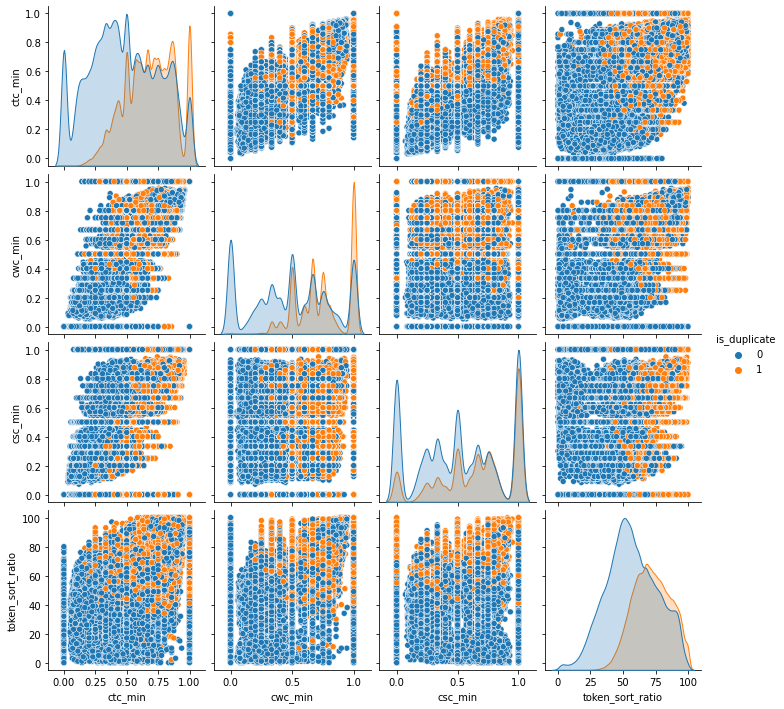

In [39]:
PIL.Image.open("pair_plot.png")